In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/goodreads-books-reviews-290312/goodreads_test.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_sample_submission.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_train.csv


### Uploading and examinig the train data

In [2]:
train_data = pd.read_csv('../input/goodreads-books-reviews-290312/goodreads_train.csv')
train_data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [3]:
train_data.shape

(900000, 11)

In [4]:
train_data.isnull().any()

user_id         False
book_id         False
review_id       False
rating          False
review_text     False
date_added      False
date_updated    False
read_at          True
started_at       True
n_votes         False
n_comments      False
dtype: bool

### The number of users

In [5]:
train_data['user_id'].nunique()

12188

### The number of books

In [6]:
train_data['book_id'].nunique()

25474

### The number of reviews is the same as the data

In [7]:
train_data['review_id'].nunique()

900000

### Removing the columns we are not going to use

In [8]:
train_data.drop(['date_added','date_updated','read_at','started_at'],axis=1, inplace=True)
train_data.head()

,user_id,book_id,review_id,rating,review_text,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",9,1


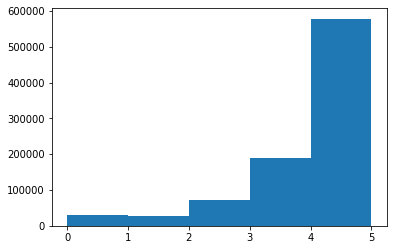

In [9]:
fig, ax = plt.subplots()

ax.hist(train_data['rating'], bins=5)
plt.show()

In [10]:
train_data.describe()

,book_id,rating,n_votes,n_comments
count,9.000000e+05,900000.000000,900000.000000,900000.000000
mean,1.344145e+07,3.689639,3.294381,1.016656
std,9.357863e+06,1.252583,17.873553,5.963821
min,1.000000e+00,0.000000,-3.000000,-1.000000
25%,6.340471e+06,3.000000,0.000000,0.000000
50%,1.344203e+07,4.000000,0.000000,0.000000
75%,2.057897e+07,5.000000,2.000000,0.000000
max,3.632868e+07,5.000000,3222.000000,1335.000000


In [11]:
train_data.groupby('rating').describe()

book_id                                                           \
           count          mean           std  min         25%         50%   
rating                                                                      
0        30988.0  1.531129e+07  9.680614e+06  1.0  7959280.25  16075939.0   
1        28718.0  1.204804e+07  9.237494e+06  1.0  2738193.50  11857408.0   
2        72627.0  1.261558e+07  9.272870e+06  1.0  5060378.00  12578294.0   
3       188972.0  1.284973e+07  9.317546e+06  1.0  5618698.00  12924279.0   
4       313688.0  1.354658e+07  9.343166e+06  1.0  6430659.00  13481275.0   
5       265007.0  1.389764e+07  9.333513e+06  1.0  6611521.50  13641101.0   

                                 n_votes            ...               \
               75%         max     count      mean  ...  75%     max   
rating                                              ...                
0       23127500.0  36328685.0   30988.0  4.319349  ...  2.0  1156.0   
1       18339662.0  36158863.0   28718.0  5.960513  ...  2.0  2549.0   
2       18710190.0  36252773.0   72627.0  3.015600  ...  1.0  2245.0   
3       19090384.0  36252773.0  188972.0  2.174555  ...  1.0  1710.0   
4       20640755.0  36328685.0  313688.0  2.926660  ...  2.0  2333.0   
5       20803953.0  36328685.0  265007.0  4.195810  ...  2.0  3222.0   

       n_comments                                                   
            count      mean        std  min  25%  50%  75%     max  
rating                                                              
0         30988.0  1.432458  11.662875  0.0  0.0  0.0  0.0  1335.0  
1         28718.0  2.047566  11.584845 -1.0  0.0  0.0  0.0   564.0  
2         72627.0  1.070690   6.673441 -1.0  0.0  0.0  0.0   655.0  
3        188972.0  0.685461   3.931856 -1.0  0.0  0.0  0.0   448.0  
4        313688.0  0.870923   4.711809 -1.0  0.0  0.0  0.0   660.0  
5        265007.0  1.250182   6.367146  0.0  0.0  0.0  0.0   833.0  

[6 rows x 24 columns]

<AxesSubplot:xlabel='rating', ylabel='Users'>

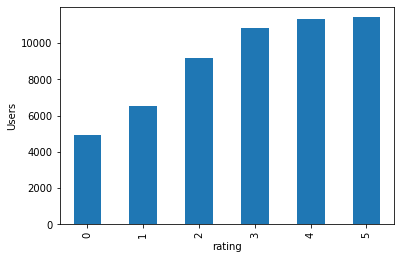

In [12]:
train_data.groupby('rating')['user_id'].nunique().plot.bar(ylabel = "Users")

<AxesSubplot:xlabel='rating', ylabel='Books'>

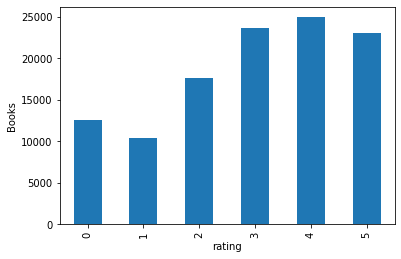

In [13]:
train_data.groupby('rating')['book_id'].nunique().plot.bar(ylabel = "Books")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='rating'>

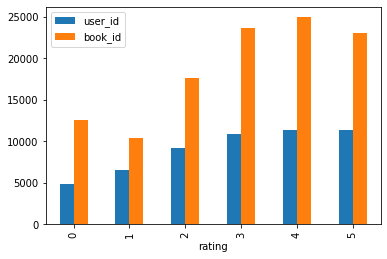

In [14]:
train_data.groupby('rating')['user_id', 'book_id'].nunique().plot.bar()

### There are negative number of votes

In [15]:
train_data.sort_values(by=['n_votes'])

,user_id,book_id,review_id,rating,review_text,n_votes,n_comments
110253,9c705d573943f354e90b5d033871e894,59264,eac9389573a0958af0a15fa1ead3e728,5,I'm bored so I'm going to review this #12 \n R...,-3,1
542798,25004d7967519f9b8fd4f1fcdec66a8e,20932616,0148ae81f524f7c2d0ab26b3a81e12d4,5,"So when I was reading the Tiger series, I didn...",-3,0
732439,22a2017d28bad8b866860210c8746f0e,22447220,e291704f262f9eb4328de9b938a3d765,5,"Oh, that moment when you realize: I'm done. Th...",-2,1
542324,13f9e9579267823286ab0c307b6f8a70,11918,a8c166fc0beddaa3dfb8a5da59ddb189,4,I love this book - possibly my favorite of all...,-2,0
215484,d91b6d7a69d077299f160925ff777be4,16085457,8ac49bd0429ba37f14652cb5344acb8e,5,A satisfying conclusion,-2,0
...,...,...,...,...,...,...,...
510984,8cf5e7b479644265868bd08e8f64b622,8667848,03361c23fbf3cc68cedbe08f920f36fe,1,"okay, so the good things: I liked the world/my...",2252,509
879300,114d8821adeb988a240b9ec4c68078a0,29056083,bb1641ff2401ea6b24c690d224a51f1d,4,It was alright. It was just alright. \n I know...,2333,160
436726,f18811ea6ea82ee427be7ebeef1050da,29056083,1dd32ab0bb1a0f7545390ed69d149573,1,Ok wow where do I even begin with this. \n My ...,2549,229
608100,abc4a0147e00cf29d7a9d865ecdf160c,18405388,525e2bd48ae0d40301c33350aaaf790a,5,"So listen. Look. I am a READER, right? I mean,...",3167,537


Converting negative numbers to positive numbers (I assume negative ones are typo).

In [16]:
for n in train_data['n_votes']:
    if n < 0:
        train_data['n_votes'] = train_data['n_votes'].replace(n,-n)
      

In [17]:
train_data.sort_values(by=['n_votes'])  

,user_id,book_id,review_id,rating,review_text,n_votes,n_comments
899999,b9450d1c1f97f891c392b1105959b56e,17005,d55f3a967230940e75a314700caec9a5,3,** spoiler alert ** \n 3.5 stars \n I liked it...,0,0
448558,b96fb928c4aec6d78d841e879f4d9f9c,13056511,5be492c2fde835a17fd78125aaac52c2,4,1/2 \n Heaven was a fitting end to this sweet ...,0,0
448561,b96fb928c4aec6d78d841e879f4d9f9c,12096557,15ce4af19ca4ee044363d96e97a271e4,4,I just finished reading Blood Bound today. I l...,0,0
448562,b96fb928c4aec6d78d841e879f4d9f9c,16070143,fa99b2732ad69efab99d684222874737,3,"Overall I liked it, but I couldn't connect to ...",0,0
448563,b96fb928c4aec6d78d841e879f4d9f9c,13040826,fa51318b552e1f7e28a1306e7f7e6681,3,I love J.R. Ward's Black Dagger Brotherhood va...,0,0
...,...,...,...,...,...,...,...
510984,8cf5e7b479644265868bd08e8f64b622,8667848,03361c23fbf3cc68cedbe08f920f36fe,1,"okay, so the good things: I liked the world/my...",2252,509
879300,114d8821adeb988a240b9ec4c68078a0,29056083,bb1641ff2401ea6b24c690d224a51f1d,4,It was alright. It was just alright. \n I know...,2333,160
436726,f18811ea6ea82ee427be7ebeef1050da,29056083,1dd32ab0bb1a0f7545390ed69d149573,1,Ok wow where do I even begin with this. \n My ...,2549,229
608100,abc4a0147e00cf29d7a9d865ecdf160c,18405388,525e2bd48ae0d40301c33350aaaf790a,5,"So listen. Look. I am a READER, right? I mean,...",3167,537


### and There are negative number of comments

In [18]:
train_data.sort_values(by=['n_comments'])

,user_id,book_id,review_id,rating,review_text,n_votes,n_comments
570065,3687fcc87a9c2d733df8cfc43ae8dcfe,26860475,9235c340d5beef19271ba880c9db559b,4,The review is for Life and Death only. \n 3.5/...,6,-1
13007,feafbae6a2cf100c84a712edd03e930d,1828067,aef92262bb2cda22247768affe7582b9,2,"I haven't had much luck finding new, entertain...",7,-1
622493,26b6d2e8d2c2e2f76a70a3359ba76c6a,17572903,bbcd01ffb27e53927825506ad3346ad5,4,My new historical fiction interest is WWI. \n ...,9,-1
13045,feafbae6a2cf100c84a712edd03e930d,17645,29a5a6522bfc6496ec5a55efedcceef6,3,I finished rereading this and found it conside...,2,-1
157212,06e1a327fd336d7eee74aa62f1275386,12031532,c1a21535a8c1c180fc5296b47dbc9a78,3,Sometimes it hurts to give a book three stars....,4,-1
...,...,...,...,...,...,...,...
296971,033cf640dfa6f85eb146c39787289628,12649718,e3cd6e5463ff21558ba0111166885676,2,*WARNING: UNPOPULAR OPINION TIME* \n People se...,2245,655
766303,f25efea9ef366b3c1465342f75a0f24e,13453029,57d794c7dc85d5ec2da3e8f4c096e34c,4,"There are two stupid things about this book, n...",259,660
130891,d89ddf4e446dc188dede6c1c55792bed,4667024,deddd7adf1df5f80b12e8fbf163b90dd,0,"I have this terrible, dreary feeling in my dia...",494,804
430397,7ae994deaec533582e797618bc2bf68a,7046495,e8e77feeb2f743c5263d660363d134d4,5,Some things are destined to be- \n It just tak...,175,833


Converting negative numbers to positive number 

In [19]:
for n in train_data['n_comments']:
    if n < 0:
        train_data['n_comments'] = train_data['n_comments'].replace(n,-n)
      

In [20]:
train_data.sort_values(by=['n_comments'])

,user_id,book_id,review_id,rating,review_text,n_votes,n_comments
449999,c8aadd507f4b30abe6fc963f23640ca5,22885333,b5bab6eb0e9b68789b0c7e90d2c3cfd4,4,All the miscommunication and arguing made me c...,3,0
573840,00238d8a4c276c47f5d5e242f54a8f28,7514925,025ce726044f7104fe6b86bc98bc846d,3,Rating: 3.5 \n I love retellings so I had high...,3,0
573841,00238d8a4c276c47f5d5e242f54a8f28,12977172,1be4f4f49a1030a1bbad0fbf575cf01d,5,I'm loving the Elemental series by Brigid Kemm...,1,0
573842,00238d8a4c276c47f5d5e242f54a8f28,25182342,a3b0bc245b413a31715d22eb993d3d93,5,"Wow, this was so much more than what I was exp...",2,0
573843,00238d8a4c276c47f5d5e242f54a8f28,16248068,1b663b84e4fa1774958bed663037dce3,4,The second book in The Selection series was de...,1,0
...,...,...,...,...,...,...,...
296971,033cf640dfa6f85eb146c39787289628,12649718,e3cd6e5463ff21558ba0111166885676,2,*WARNING: UNPOPULAR OPINION TIME* \n People se...,2245,655
766303,f25efea9ef366b3c1465342f75a0f24e,13453029,57d794c7dc85d5ec2da3e8f4c096e34c,4,"There are two stupid things about this book, n...",259,660
130891,d89ddf4e446dc188dede6c1c55792bed,4667024,deddd7adf1df5f80b12e8fbf163b90dd,0,"I have this terrible, dreary feeling in my dia...",494,804
430397,7ae994deaec533582e797618bc2bf68a,7046495,e8e77feeb2f743c5263d660363d134d4,5,Some things are destined to be- \n It just tak...,175,833


### We are searching a relationship between number of comments and numbers of votes with ratings

Text(0, 0.5, 'Rating')

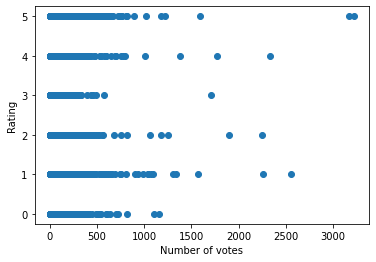

In [21]:
fig, ax = plt.subplots()

plt.scatter(x = train_data['n_votes'], y = train_data['rating'])
plt.xlabel('Number of votes')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

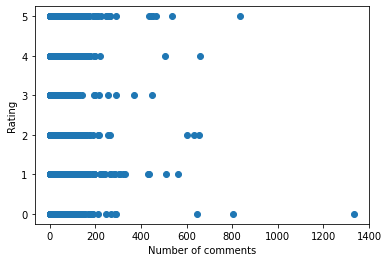

In [22]:
fig, ax = plt.subplots()

plt.scatter(x = train_data['n_comments'], y = train_data['rating'])
plt.xlabel('Number of comments')
plt.ylabel('Rating')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='rating'>

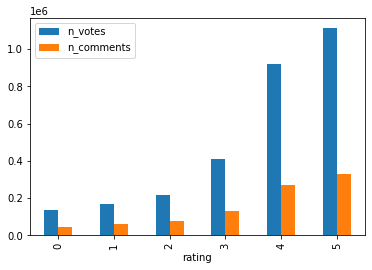

In [23]:
train_data.groupby('rating')['n_votes','n_comments'].sum().plot.bar()

It is wrong look at the sum because the number of ratings also in effect so it is better to look at average

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='rating'>

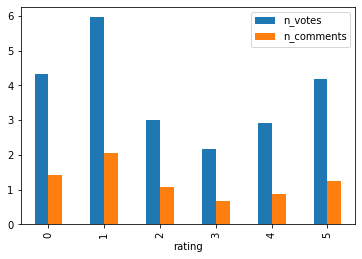

In [24]:
train_data.groupby('rating')['n_votes','n_comments'].mean().plot.bar()

### Let's check length of reviews' connection with rating

In [25]:
train_data['review_len'] = train_data['review_text'].str.len()


<AxesSubplot:xlabel='rating'>

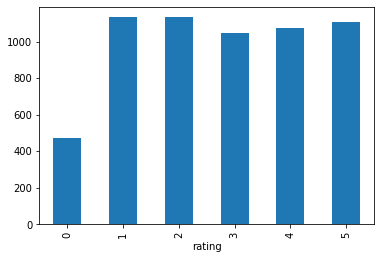

In [26]:
train_data.groupby('rating')['review_len'].mean().plot.bar()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


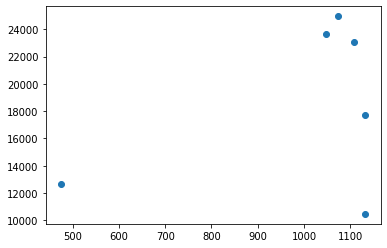

In [27]:
x_rev = train_data.groupby('rating')['review_len'].mean()
y_rev = train_data.groupby('rating')['user_id', 'book_id'].nunique()
c_rev = np.array(train_data.groupby('rating')['rating'])

fig, ax = plt.subplots()

ax.scatter(x = x_rev, y = y_rev['book_id'])

In [28]:
df_book = train_data.groupby('book_id').mean()
df_book.head()

,rating,n_votes,n_comments,review_len
book_id,,,,
1,4.571795,1.815385,0.520513,678.310256
2,4.424390,2.670732,0.721951,737.519512
3,4.521862,4.568406,1.607898,625.464034
5,4.652083,3.268750,0.604167,591.866667
6,4.587444,2.876682,0.477578,671.006726


In [29]:
df_book['user_count'] = train_data.groupby('book_id').count()['user_id']
#df_book['book'] = train_data.groupby('book_id')['rating']
df_book.head()

,rating,n_votes,n_comments,review_len,user_count
book_id,,,,,
1,4.571795,1.815385,0.520513,678.310256,390
2,4.424390,2.670732,0.721951,737.519512,410
3,4.521862,4.568406,1.607898,625.464034,709
5,4.652083,3.268750,0.604167,591.866667,480
6,4.587444,2.876682,0.477578,671.006726,446


### Scatter plot between user numbers for review and review text length red color is rating 5 and blue color is rating 0

<AxesSubplot:xlabel='review_len', ylabel='user_count'>

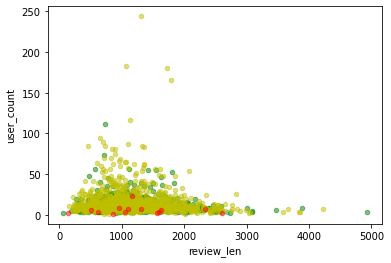

In [30]:
#c_user.to_numpy()
fig, ax = plt.subplots()

df_book[df_book['rating'] == 1].plot.scatter(x='review_len', y='user_count', c='b', alpha=.5, ax=ax)
df_book[df_book['rating'] == 2].plot.scatter(x='review_len', y='user_count', c='c', alpha=.5, ax=ax)
df_book[df_book['rating'] == 3].plot.scatter(x='review_len', y='user_count', c='g', alpha=.5, ax=ax)
df_book[df_book['rating'] == 4].plot.scatter(x='review_len', y='user_count', c='y', alpha=.5, ax=ax)
df_book[df_book['rating'] == 5].plot.scatter(x='review_len', y='user_count', c='r', alpha=.5, ax=ax)

In [31]:
train_data.groupby('book_id')['rating'].mean()

book_id
1           4.571795
2           4.424390
3           4.521862
5           4.652083
6           4.587444
              ...   
36196052    4.500000
36242916    3.000000
36252773    4.000000
36307629    0.000000
36328685    4.250000
Name: rating, Length: 25474, dtype: float64

<AxesSubplot:xlabel='rating'>

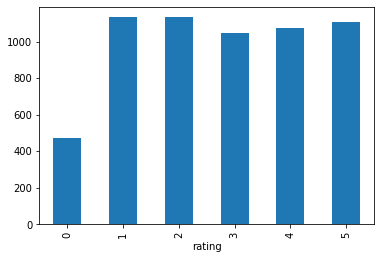

In [32]:
train_data.groupby('rating')['review_len'].mean().plot.bar()

In [33]:
train_data.corr()

,book_id,rating,n_votes,n_comments,review_len
book_id,1.000000,0.022840,0.076206,0.030067,0.095084
rating,0.022840,1.000000,0.006665,-0.003532,0.051364
n_votes,0.076206,0.006665,1.000000,0.626734,0.149190
n_comments,0.030067,-0.003532,0.626734,1.000000,0.169854
review_len,0.095084,0.051364,0.149190,0.169854,1.000000


### There are no obvious corelation between rating and other numbers so we will try classfication method

<b> Seperating train data into another train test data to test classification </b>

In [34]:
X = df_book[['user_count', 'n_votes', 'n_comments', 'review_len']]
y = df_book['rating'].round()
y = np.array(y)

In [35]:
from sklearn.model_selection import train_test_split
X_train_try, X_test_try, y_train_try, y_test_try = train_test_split(X, y, test_size=0.2)

### We are applying  k-Nearest-Neighbors Classifier (KNN) classification

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier()
neigh.fit(X_train_try, y_train_try)
y_pred_try = neigh.predict(X_test_try)
accuracy_score(y_test_try, y_pred_try)

0.5313052011776251

### Finding best neigbors numbers

In [37]:
scores = []
for k in range(1, 400):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_try, y_train_try)
    y_pred_try = neigh.predict(X_test_try)
    score = accuracy_score(y_test_try, y_pred_try)
    scores.append(score)

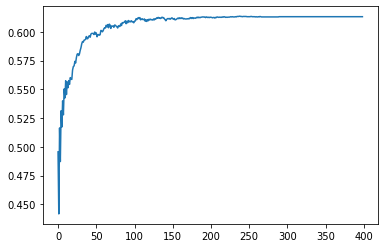

In [38]:
fig, ax = plt.subplots()

ax.plot(scores)

After n_neigbors =200 there is no big change so we can take k as 200

### Now we are doing the same thing for whole train dataframe

In [39]:
df_book = train_data.groupby('book_id').mean()
df_book['user_count'] = train_data.groupby('book_id').count()['user_id']
X_train = df_book[['user_count', 'n_votes', 'n_comments', 'review_len']]
y = df_book['rating'].round()
y_train = np.array(y)

### Uploading X_test

In [40]:
test_data = pd.read_csv('../input/goodreads-books-reviews-290312/goodreads_test.csv')
test_data.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,b9450d1c1f97f891c392b1105959b56e,7092507,5c4df7e70e9b438c761f07a4620ccb7c,** spoiler alert ** \n This is definitely one ...,Sat Nov 10 06:06:13 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sat Nov 10 00:00:00 -0800 2012,1,0
1,b9450d1c1f97f891c392b1105959b56e,5576654,8eaeaf13213eeb16ad879a2a2591bbe5,"** spoiler alert ** \n ""You are what you drink...",Fri Nov 09 21:55:16 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,1,0
2,b9450d1c1f97f891c392b1105959b56e,15754052,dce649b733c153ba5363a0413cac988f,Roar is one of my favorite characters in Under...,Fri Nov 09 00:25:50 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,0,0
3,b9450d1c1f97f891c392b1105959b56e,17020,8a46df0bb997269d6834f9437a4b0a77,** spoiler alert ** \n If you feel like travel...,Thu Nov 01 00:28:39 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Thu Nov 01 00:00:00 -0700 2012,0,0
4,b9450d1c1f97f891c392b1105959b56e,12551082,d11d3091e22f1cf3cb865598de197599,3.5 stars \n I read and enjoyed the first two ...,Thu Oct 18 00:57:00 -0700 2012,Mon Apr 01 23:00:51 -0700 2013,Sat Mar 30 00:00:00 -0700 2013,Fri Mar 29 00:00:00 -0700 2013,0,0


Doing the same procedures

In [41]:
#Droping columns which are not used
test_data.drop(['date_added','date_updated','read_at','started_at'],axis=1, inplace=True)

# Converting negative comments,votes to positive
for n in test_data['n_comments']:
     if n < 0:
        test_data['n_comments'] = test_data['n_comments'].replace(n,-n)
        
for n in test_data['n_votes']:
     if n < 0:
        test_data['n_votes'] = test_data['n_votes'].replace(n,-n)        
 
 # Finding review text length
test_data['review_len'] = test_data['review_text'].str.len()

# Grouping data by book and take average of votes, comments and numbers of users who reviewed
df_book = test_data.groupby('book_id').mean()
df_book['user_count'] = test_data.groupby('book_id').count()['user_id']
X_test = df_book[['user_count', 'n_votes', 'n_comments', 'review_len']]

### Applying  k-Nearest-Neighbors Classifier (KNN) to the whole train data

In [42]:
neigh1 = KNeighborsClassifier(n_neighbors = 200)
neigh1.fit(X_train, y_train)
y_pred = neigh1.predict(X_test)

### Now we have ratings associated with book_id but we need to associate them with review_id for submission

In [43]:
y_pred.shape, len(X_test)

((25399,), 25399)

In [44]:
y_rating = pd.DataFrame(y_pred, columns=['rating'],dtype=int)
X_test.loc[:,'rating'] = y_pred.astype(int)
X_test.tail()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,user_count,n_votes,n_comments,review_len,rating
book_id,,,,,
36196052,5,3.600000,0.000000,582.400000,4
36242916,3,2.666667,0.000000,1068.333333,4
36252773,6,29.833333,6.666667,1611.666667,4
36307629,22,37.000000,2.909091,144.863636,4
36328685,2,20.500000,1.500000,1276.500000,4


In [45]:
X_test['rating'].describe()

count    25399.000000
mean         3.993031
std          0.083189
min          3.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: rating, dtype: float64

In [46]:
sub_data = pd.read_csv("../input/goodreads-books-reviews-290312/goodreads_sample_submission.csv")

In [47]:
df_sub = test_data[['review_id','book_id']]

In [48]:
result = pd.merge(df_sub, X_test, how = 'left', on = ['book_id'])
result.head()

,review_id,book_id,user_count,n_votes,n_comments,review_len,rating
0,5c4df7e70e9b438c761f07a4620ccb7c,7092507,11,0.545455,0.090909,832.818182,4
1,8eaeaf13213eeb16ad879a2a2591bbe5,5576654,16,2.000000,0.062500,768.375000,4
2,dce649b733c153ba5363a0413cac988f,15754052,55,1.036364,0.163636,581.109091,4
3,8a46df0bb997269d6834f9437a4b0a77,17020,81,0.296296,0.209877,1051.716049,4
4,d11d3091e22f1cf3cb865598de197599,12551082,40,1.300000,0.450000,1474.275000,4


In [49]:
result.describe()

,book_id,user_count,n_votes,n_comments,review_len,rating
count,4.780330e+05,478033.000000,478033.000000,478033.000000,478033.000000,478033.000000
mean,1.320363e+07,90.333774,2.721216,0.798006,1076.183197,3.995161
std,9.071462e+06,132.473632,3.325982,1.105773,413.388117,0.069391
min,1.000000e+00,1.000000,0.000000,0.000000,9.000000,3.000000
25%,6.489636e+06,15.000000,0.868657,0.238806,803.095238,4.000000
50%,1.320676e+07,38.000000,1.766667,0.526104,1034.303571,4.000000
75%,1.877525e+07,105.000000,3.371429,0.944444,1285.514925,4.000000
max,3.632868e+07,1011.000000,149.000000,40.000000,8828.000000,4.000000


In [50]:
result_sub = result[['review_id', 'rating']]
result_sub.to_csv("submission.csv", index=False)

In [51]:
len(df_sub), len(result_sub)

(478033, 478033)